# 911 Calls Capstone Project

For this capstone project I will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)


## Data and Setup

### Importing numpy and pandas

In [254]:
import numpy as np
import pandas as pd

### Importing visualization libraries and set %matplotlib inline

In [255]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

### Reading 911 csv file as a dataframe called df

In [256]:
df = pd.read_csv('911.csv')

### Checking the info() of the df

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


### Checking the head of df

In [258]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

### What are the top 5 zipcodes for 911 calls?

In [259]:
df['zip'].value_counts().iloc[0:5]

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

### What are the top 5 townships (twp) for 911 calls?

In [260]:
df['twp'].value_counts().iloc[0:5]

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

### How many unique title codes are there in the 'title' column?

In [261]:
df['title'].nunique()

110

## Creating new features

### In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Using .apply() with a custom lambda expression we will create a new column called "Reason" that contains this string value.

#### For example, if the title column value is EMS: BACK PAINS/INJURY, the Reason column value will be EMS.

In [263]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire


### What is the most common Reason for a 911 call based off of this new column?

In [264]:
df['Reason'].value_counts().iloc[0:3]

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

### Using seaborn to create a countplot of 911 calls by Reason.

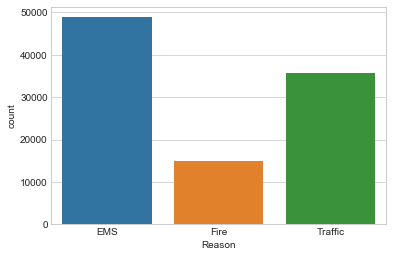

In [265]:
sns.countplot(x='Reason', data=df)

___
** What is the data type of the objects in the timeStamp column? **

In [266]:
type(df['timeStamp'].iloc[0])

str

### As shown above these timestamps are still strings. Using [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects.

In [267]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

### Now that the timestamp column are actually DateTime objects, we will use .apply() to create 3 new columns called 'Hour', 'Month', and 'Day of Week'.

### We can now grab specific attributes from a Datetime object by calling them. For example:

    time = df['timeStamp'].iloc[0]
    time.hour

In [268]:
df['Hour'] = df['timeStamp'].apply(lambda timeStamp: timeStamp.hour)
df['Month'] = df['timeStamp'].apply(lambda timeStamp: timeStamp.month)
df['Day of Week'] = df['timeStamp'].apply(lambda timeStamp: timeStamp.dayofweek)
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3


### Notice how the Day of Week is an integer 0-6. Let's map the actual string names to the day of the week using the .map() method with the below given dictionary:

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [269]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [270]:
# df['Day of Week'] = df['Day of Week'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})
df['Day of Week'] = df['Day of Week'].map(dmap)
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu


### Using seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.

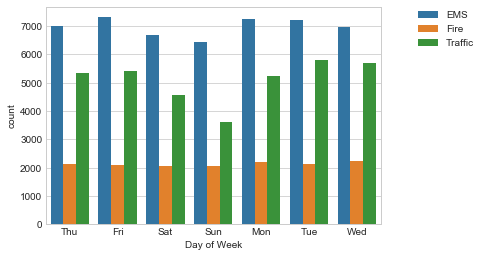

In [271]:
sns.countplot(x='Day of Week', data=df, hue='Reason')

#To relocate the legend
plt.legend(bbox_to_anchor=(1.1, 1), borderaxespad=0)

**Countplot plot with Month:**

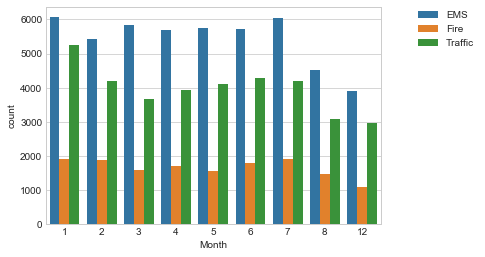

In [272]:
sns.countplot(x='Month', data=df, hue='Reason')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0)

_____

### As we can see, the above plot is missing some Months, let's fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas

### Creating a gropuby object called 'byMonth', where we group the DataFrame by the month column and use the count() method for aggregation

In [273]:
byMonth = df.groupby('Month').count()
byMonth.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101


### Creating a simple plot off of the dataframe indicating the count of calls per month

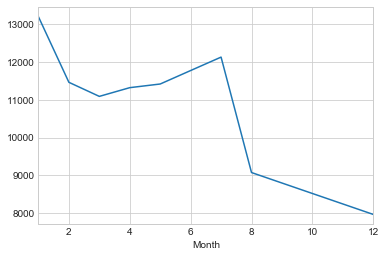

In [274]:
byMonth['twp'].plot()

### Using seaborn's lmplot() to create a linear fit on the number of calls per month

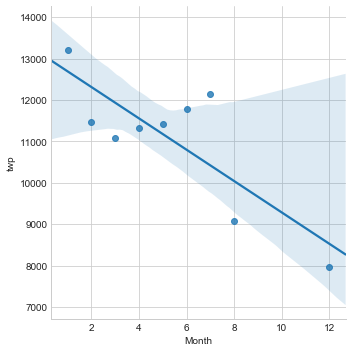

In [276]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

**Creating a new 'Date' column which contains the date from the timeStamp column. This is achieved by using 'apply' along with the .date() method. ** 

In [277]:
df['Date'] = df['timeStamp'].apply(lambda timeStamp: timeStamp.date())

### Applying a groupby with the count() aggregate on Date column and creating a plot of counts of 911 calls

Text(0.5,1,'Count of 911 calls')

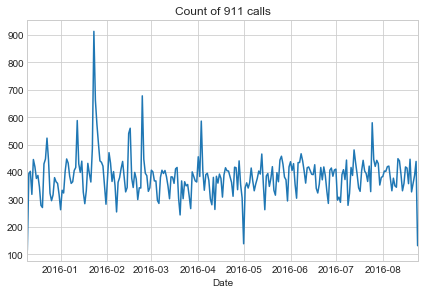

In [317]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()
plt.title('Count of 911 calls')

### Recreating this plot 3 different times. Each plot represents a Reason for the 911 call

Text(0.5,1,'EMS')

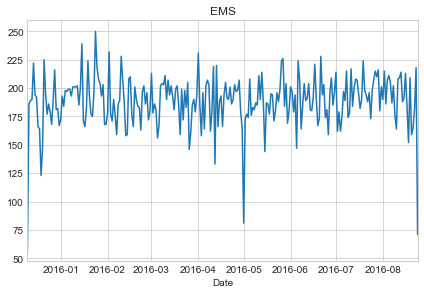

In [279]:
df[df['Reason'] == 'EMS'].groupby('Date').count()['twp'].plot()
plt.tight_layout()
plt.title('EMS')

Text(0.5,1,'Fire')

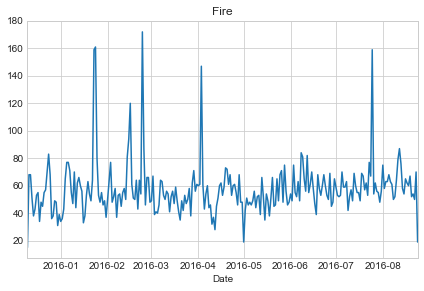

In [280]:
df[df['Reason'] == 'Fire'].groupby('Date').count()['twp'].plot()
plt.tight_layout()
plt.title('Fire')

Text(0.5,1,'Traffic')

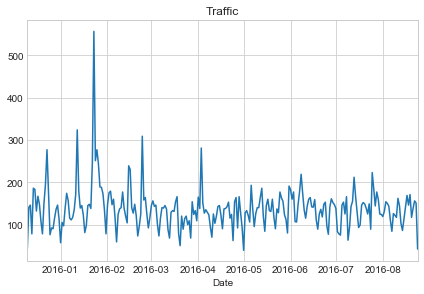

In [281]:
df[df['Reason'] == 'Traffic'].groupby('Date').count()['twp'].plot()
plt.tight_layout()
plt.title('Traffic')

____
### Let's create heatmaps using seaborn. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. We will achieve this by combining groupby and [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method

In [286]:
day_hours = df.groupby(by=['Day of Week', 'Hour']).count()['Reason'].unstack()
day_hours.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


### Creating a HeatMap using this new DataFrame

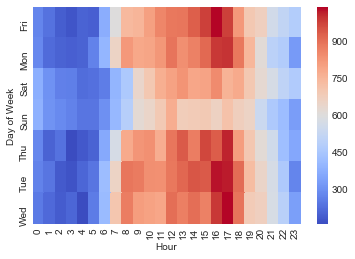

In [306]:
sns.heatmap(day_hours, cmap='coolwarm')

### Creating a clustermap using this DataFrame

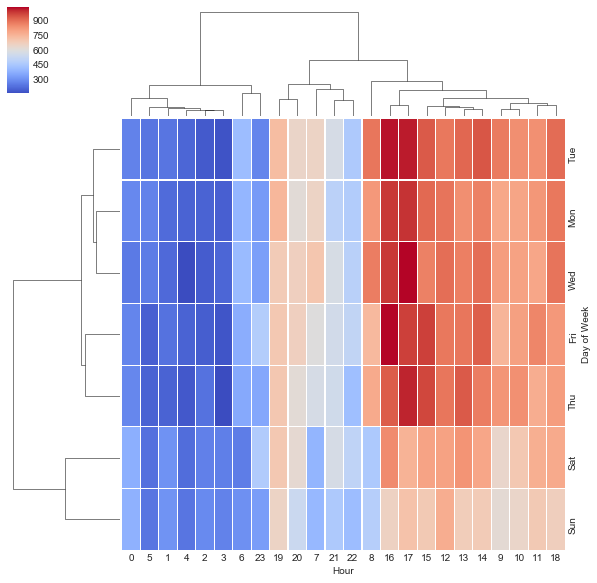

In [307]:
sns.clustermap(day_hours,cmap='coolwarm', linewidths=0.1)

### Now we repeat these same plots and operations, for a DataFrame that shows the Month as the column

In [308]:
day_months = df.groupby(by=['Day of Week', 'Month']).count()['Reason'].unstack()
day_months.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


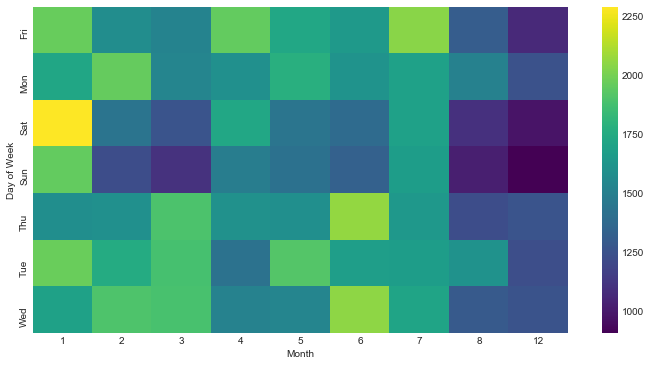

In [313]:
plt.figure(figsize=(12,6))
sns.heatmap(day_months, cmap='viridis')

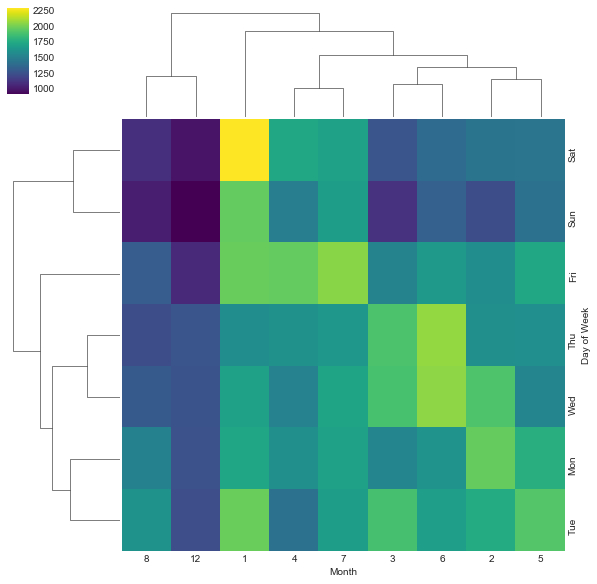

In [315]:
plt.figure(figsize=(12,6))
sns.clustermap(day_months, cmap='viridis')


# Finished!
**Thank you for your time.**